# 이미지 인식 - 딥 러닝
### MNIST 손글씨 데이터

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

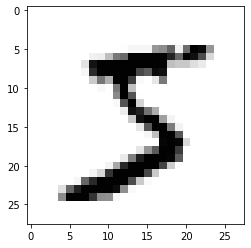

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [5]:
import sys
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%3d ' % i)
    sys.stdout.write('\n')

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

In [6]:
# X_train 정규화
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255.0

In [7]:
X_train.shape

(60000, 784)

In [8]:
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [9]:
Y_class_train[0]

5

In [10]:
# One-Hot Encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_class_train, 10)
Y_test = to_categorical(Y_class_test, 10)

In [11]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import numpy as np
import os

In [13]:
# seed 값 설정
seed = 0
np.random.seed(seed)

In [14]:
# 모델 프레임 설정
model = Sequential([
    Dense(512, input_dim=784, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [15]:
# 모델 실행 환경 설정 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
# 모델 최적화 설정
MODEL_DIR = './model/mnist/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [17]:
modelpath = MODEL_DIR + "mnist{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [18]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_split=0.2, 
                    epochs=30, batch_size=200, verbose=0, 
                    callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.17541, saving model to ./model/mnist/mnist01-0.1754.hdf5

Epoch 00002: val_loss improved from 0.17541 to 0.12066, saving model to ./model/mnist/mnist02-0.1207.hdf5

Epoch 00003: val_loss improved from 0.12066 to 0.10516, saving model to ./model/mnist/mnist03-0.1052.hdf5

Epoch 00004: val_loss improved from 0.10516 to 0.09403, saving model to ./model/mnist/mnist04-0.0940.hdf5

Epoch 00005: val_loss improved from 0.09403 to 0.08940, saving model to ./model/mnist/mnist05-0.0894.hdf5

Epoch 00006: val_loss improved from 0.08940 to 0.08258, saving model to ./model/mnist/mnist06-0.0826.hdf5

Epoch 00007: val_loss improved from 0.08258 to 0.07710, saving model to ./model/mnist/mnist07-0.0771.hdf5

Epoch 00008: val_loss did not improve from 0.07710

Epoch 00009: val_loss did not improve from 0.07710

Epoch 00010: val_loss did not improve from 0.07710

Epoch 00011: val_loss improved from 0.07710 to 0.07382, saving model to ./model/mnist/mnist11-0.07

In [23]:
from tensorflow.keras.models import load_model
del model
model = load_model('model/mnist/mnist11-0.0738.hdf5')

In [24]:
# 테스트 정확도 출력 
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test, verbose=2)[1]))

10000/10000 - 0s - loss: 0.0648 - accuracy: 0.9800

 Test Accuracy: 0.9800


In [21]:
# 검증셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

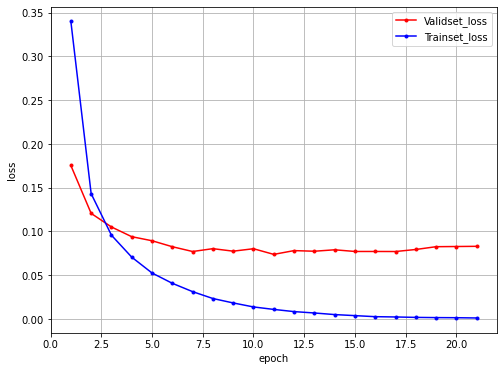

In [22]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Validset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
#plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()